In [11]:
import pandas as pd

In [12]:
series = pd.read_csv('UD.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [13]:
series.head()

Date
2010-09-01     5
2010-12-01     9
2011-03-01     6
2011-06-01     9
2011-09-01    13
Name: SumOfHIV_infected, dtype: int64

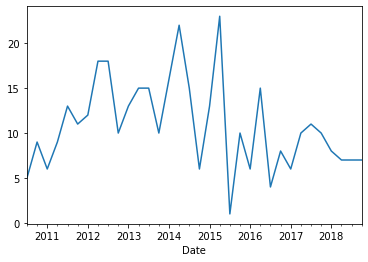

In [14]:
series.plot()

In [15]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

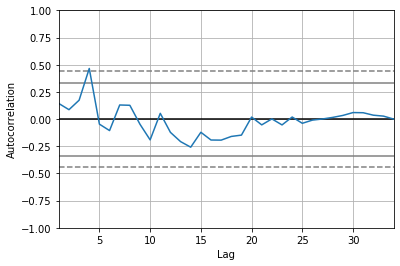

In [16]:
autocorrelation_plot(series)


In [17]:
from statsmodels.tsa.arima_model import ARIMA


In [70]:
model = ARIMA(series, order=(3,1,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


In [71]:
model_fit = model.fit(disp=0)

In [72]:
print(model_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.SumOfHIV_infected   No. Observations:                   33
Model:                  ARIMA(3, 1, 0)   Log Likelihood                 -95.616
Method:                        css-mle   S.D. of innovations              4.283
Date:                 Thu, 08 Oct 2020   AIC                            201.232
Time:                         23:13:25   BIC                            208.715
Sample:                     12-01-2010   HQIC                           203.750
                          - 12-01-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0049      0.247      0.020      0.984      -0.479       0.489
ar.L1.D.SumOfHIV_infected    -0.8724      0.142     -6.140      0.000      -1.

In [73]:
residuals = pd.DataFrame(model_fit.resid)

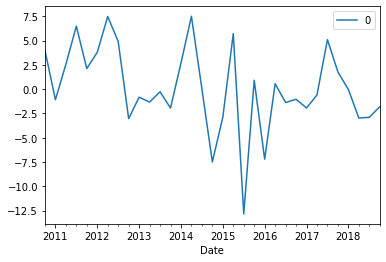

In [74]:
residuals.plot()

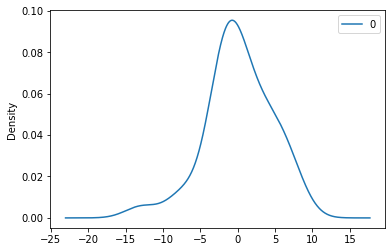

In [75]:
residuals.plot(kind='kde')

In [76]:
print(residuals.describe())

               0
count  33.000000
mean    0.120247
std     4.386225
min   -12.848559
25%    -1.937803
50%    -0.269092
75%     2.678924
max     7.507351


In [27]:
fig = model_fit.plot_predict('2019', '2025', dynamic=True, ax=series,plot_insample=False)

AttributeError: 'Series' object has no attribute 'figure'

In [32]:
ax = series.loc['2011':].plot(ax=ax)

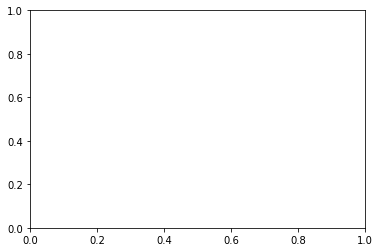

In [31]:
fig, ax = plt.subplots()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
fig = model_fit.plot_predict('2011', '2025', dynamic=True, ax=ax,plot_insample=False)

ValueError: Start must be >= k_ar for conditional MLE or dynamic forecast. Got 1

In [35]:
plt.show()

In [78]:
result = model_fit.predict(start = 1 , end = 60)

In [37]:
from statsmodels.tsa.arima_model import ARIMAResults

In [48]:
pd.lineplot()

AttributeError: module 'pandas' has no attribute 'lineplot'

In [49]:
import seaborn as sns

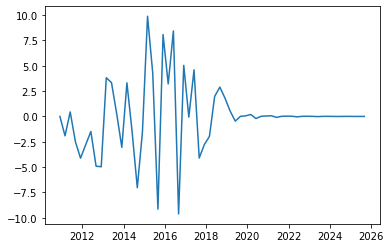

In [79]:
plt.plot(result)

In [85]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [86]:
!pip install pmdarima

In [87]:
import pmdarima as pm

In [90]:
fit = ARIMA(order=(1, 1, 1)).fit(y=wineind)


TypeError: __new__() missing 1 required positional argument: 'endog'

In [91]:
stepwise_fit = pm.auto_arima(series, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=161.360, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=146.069, Time=0.16 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=148.069, Time=0.51 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=148.069, Time=0.54 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=150.069, Time=0.53 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=145.009, Time=0.63 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 AR

In [92]:
next_25 = stepwise_fit.predict(n_periods=25)


In [93]:
next_25

array([ 6.65543355,  9.56249526,  8.13711257,  4.30333477,  9.26669282,
       15.00753233,  9.04417428,  1.08081624,  6.91459404, 15.48921135,
       -3.66002328,  4.17375453,  0.6474265 ,  8.85790207, -0.90141668,
        2.08348048,  0.98579411,  5.21137252,  5.30905888,  3.40674525,
        2.42184809,  2.66252934,  0.18116684,  1.19626968,  0.43940979])

In [95]:
plot_arima(series, next_25)


NameError: name 'plot_arima' is not defined

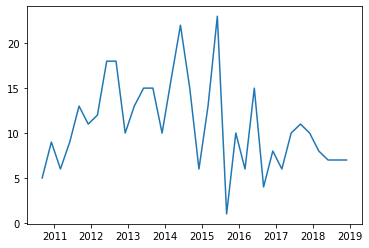

In [96]:
plt.plot(series)

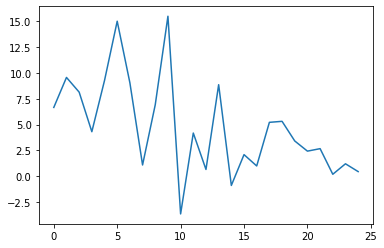

In [97]:
plt.plot(next_25)

In [98]:
stepwise_fit.update(next_25, maxiter=10)  # take 10 more steps
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   59
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -115.782
Date:                             Thu, 08 Oct 2020   AIC                            237.564
Time:                                     23:27:56   BIC                            243.050
Sample:                                          0   HQIC                           239.619
                                              - 59                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5579      0.069     -8.121      0.000      -0.693      -0.423
ar.S.L12      -0.9528      0.015    -64.522      0.000      -0.982      -0.924
sigma2         4.7878      0.595      8.047      0.000       3.622       5.954
===================================================================================
Ljung-Box (Q):                       28.11   Jarque-Bera (JB):                58.98
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
next_25 = stepwise_fit.predict(n_periods=34)


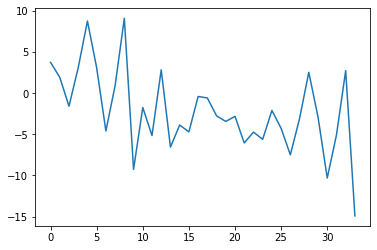

In [105]:
plt.plot(next_25)

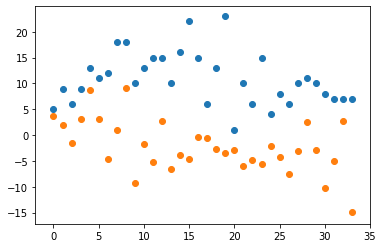

In [106]:
fig, ax1 = plt.subplots()
ax1.scatter(range(len(series)), series)
ax1.scatter(range(len(next_25)), next_25)

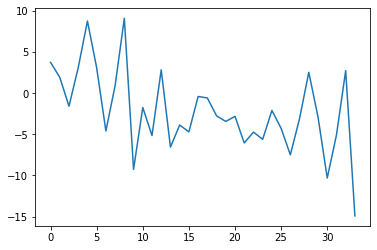

In [107]:
plt.plot(next_25)

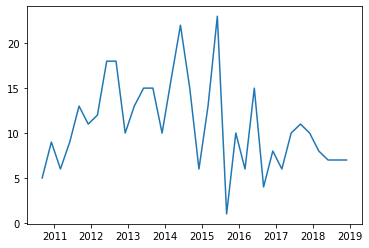

In [108]:
plt.plot(series)

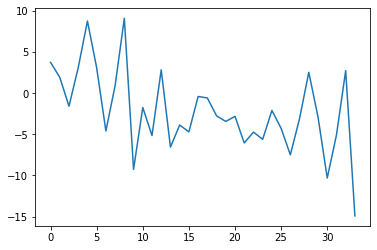

In [110]:
plt.plot(next_25)

In [114]:
plt.plot(forecast(auto.arima(ts(temps,frequency=365)),h=365))


NameError: name 'forecast' is not defined

In [115]:
from pmdarima.arima import auto_arima


In [116]:
from pmdarima.arima import ADFTest

In [117]:
adf_test = ADFTest(alpha = 0.05)

In [118]:
adf_test.should_diff(series)

(0.2707353147956164, True)

In [131]:
train = series[:30]

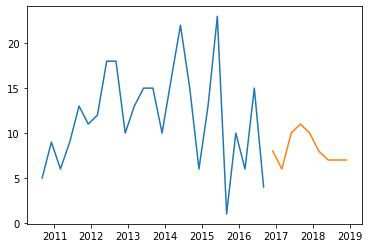

In [130]:
plt.plot(train)
plt.plot(test)

In [132]:
test = series[30:]

In [146]:
arima_model = auto_arima(series,
    start_p=0,
    d=1,
    start_q=0,
    max_p=5,
    max_d=5,
    max_q=5,
    start_P=0,
    D=1,
    start_Q=0,
    max_P=5,
    max_D=5,
    max_Q=5,
    m=12,
    seasonal=True,
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=False,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros

In [135]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -50.207
Date:                             Fri, 09 Oct 2020   AIC                            106.415
Time:                                     00:08:25   BIC                            108.915
Sample:                                          0   HQIC                           106.663
                                              - 30                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7361      0.406     -1.812      0.070      -1.532       0.060
ar.S.L12      -0.9892      0.013    -76.785      0.000      -1.014      -0.964
sigma2         1.3611      1.393      0.977      0.328      -1.368       4.090
===================================================================================
Ljung-Box (Q):                       16.17   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.44   Prob(JB):                         0.63
Heteroskedasticity (H):               1.08   Skew:                            -0.57
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
pred = pd.DataFrame(arima_model.predict(n_periods=30) , index = col)

In [148]:
col = pd.date_range(start='1/3/2019', periods=30, freq='Q')

In [143]:
plt.plot(train, label = 'Train')
plt.plot(test , label = 'Test')
plt.plot(pred , label = 'Prediction')
plt.legend(loc = 'left corner')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


ValueError: view limit minimum -36851.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

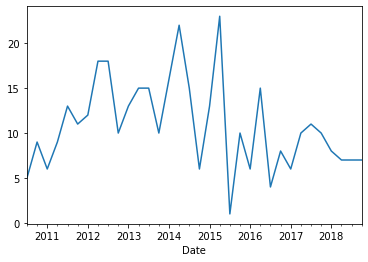

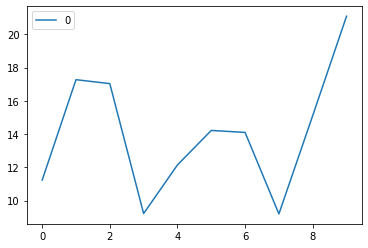

In [145]:
series.plot()
pred.plot()

In [147]:
series.tail()

Date
2017-12-01    10
2018-03-01     8
2018-06-01     7
2018-09-01     7
2018-12-01     7
Name: SumOfHIV_infected, dtype: int64

In [149]:
col

DatetimeIndex(['2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31',
               '2025-03-31', '2025-06-30', '2025-09-30', '2025-12-31',
               '2026-03-31', '2026-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

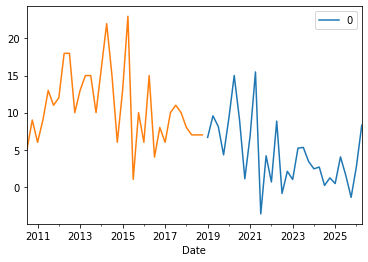

In [151]:
pred.plot()
series.plot()

In [152]:
pred

,0
2019-03-31,6.655434
2019-06-30,9.562495
2019-09-30,8.137113
2019-12-31,4.303335
2020-03-31,9.266693
2020-06-30,15.007532
2020-09-30,9.044174
2020-12-31,1.080816
2021-03-31,6.914594
2021-06-30,15.489211
